In [1]:
import gym
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from gym.envs.registration import register
from IPython.display import clear_output
from keras.models import Sequential
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory

Using TensorFlow backend.


In [21]:
#set output format for fonts and graphs
np.set_printoptions(precision=2)
plt.rcParams.update({'font.size': 18})

In [3]:
#set frozen lake environment parameters

register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False}
)

env = gym.make('FrozenLakeNotSlippery-v0')

In [4]:
#initialize q-table using environment's state and action size

#16 states
num_states = env.observation_space.n

#4 actions
num_actions = env.action_space.n

#initialize q-table
q_table = np.zeros((num_states, num_actions))

q_table.shape

(16, 4)

In [5]:
#set up our parameters for training our agent with q-learning

#training duration
num_episodes = 5000
max_steps_per_episode = 100

#q-learning parameters
learning_rate = 0.01
discount_rate = 0.8
exploration_rate = 0.9
exploration_decay_rate = 0.9999

In [22]:
#train our agent using q-learning

rewards_all_episodes = []
steps_all_episodes = []
explore_count = 0
exploit_count = 0

#training intructions for each episode
for episode in range(num_episodes):
    
    #reset environment to starting state
    state = env.reset()
    
    done = False
    rewards_current_episode = 0
    steps = 0
    
    #training instructions for each step in an episode
    for step in range(max_steps_per_episode): 
        

        
        #agent choosing to explore or exploit environment
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            #exploit: agent chooses action with highest q-table value
            action = np.argmax(q_table[state,:])
            exploit_count +=1
        else:
            #explore: agent chooses random action
            action = env.action_space.sample()
            explore_count +=1

        #agent takes action
        next_state, reward, done, info = env.step(action)

        #q-table is updated based on action taken
        q_table[state, action] = q_table[state, action] + learning_rate * (reward + discount_rate * np.max(q_table[next_state, :]) - q_table[state, action])

        #update state and reward
        state = next_state
        rewards_current_episode += reward

        steps +=1

        exploration_rate = exploration_rate * exploration_decay_rate
        
        if done == True:
            break
            
    # Add current episode reward to total rewards list
    rewards_all_episodes.append(rewards_current_episode)
    steps_all_episodes.append(steps)
    
#     if episode % 100 == 0:
#         clear_output(wait=True)
#         print(f"Episode: {episode}")

print(f'Explore count: {explore_count}')
print(f'Exploit count: {exploit_count}')

#print updated q table
print('\nQ table after training\n')
print(q_table)  

#[6] - reference list in report

Explore count: 16
Exploit count: 29998

Q table after training

[[1.01e-01 3.28e-01 2.26e-02 1.18e-01]
 [7.77e-03 0.00e+00 7.65e-02 9.41e-04]
 [1.16e-03 2.26e-01 3.33e-05 5.69e-03]
 [2.46e-03 0.00e+00 4.67e-06 5.55e-06]
 [1.58e-01 4.10e-01 0.00e+00 1.24e-01]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 5.31e-01 0.00e+00 3.89e-03]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [2.12e-01 0.00e+00 5.12e-01 1.65e-01]
 [2.07e-01 3.37e-01 6.40e-01 0.00e+00]
 [2.93e-01 8.00e-01 0.00e+00 2.01e-01]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 6.31e-02 7.29e-01 3.27e-02]
 [3.43e-01 6.20e-01 1.00e+00 4.10e-01]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00]]


In [7]:
#Calculate and print the average reward per hundred episodes
#uncomment print statements to visualise

rewards_per_hundred_episodes = np.split(np.array(rewards_all_episodes), num_episodes/100)
count = 100
# print('Average reward per 100 episodes\n')
for r in rewards_per_hundred_episodes:
#     print(count, " : ", str(sum(r/100)))
    count +=100

In [8]:
#Calculate and print the average steps per hundred episodes
#uncomment print statements to visualise

steps_per_hundred_episodes = np.split(np.array(steps_all_episodes), num_episodes/100)
count = 100
# print('Average steps per 100 episodes\n')
for r in steps_per_hundred_episodes:
#     print(count, " : ", str(sum(r/100)))
    count +=100

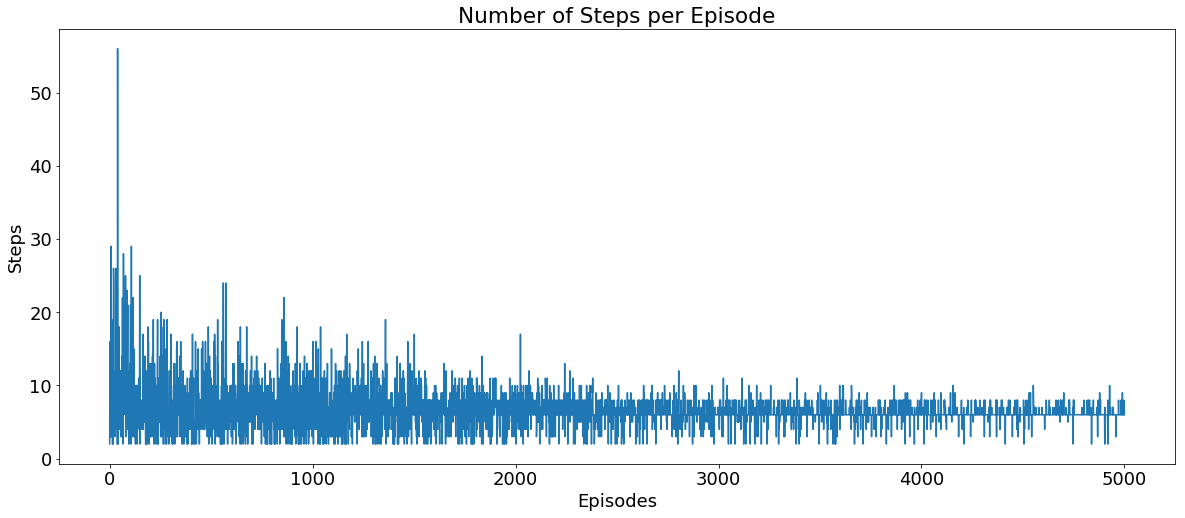

In [9]:
#plot number steps per episode
plt.figure(figsize=(20, 8))
plt.plot(steps_all_episodes)
plt.title('Number of Steps per Episode')
plt.xlabel('Episodes')
plt.ylabel('Steps')
plt.show()

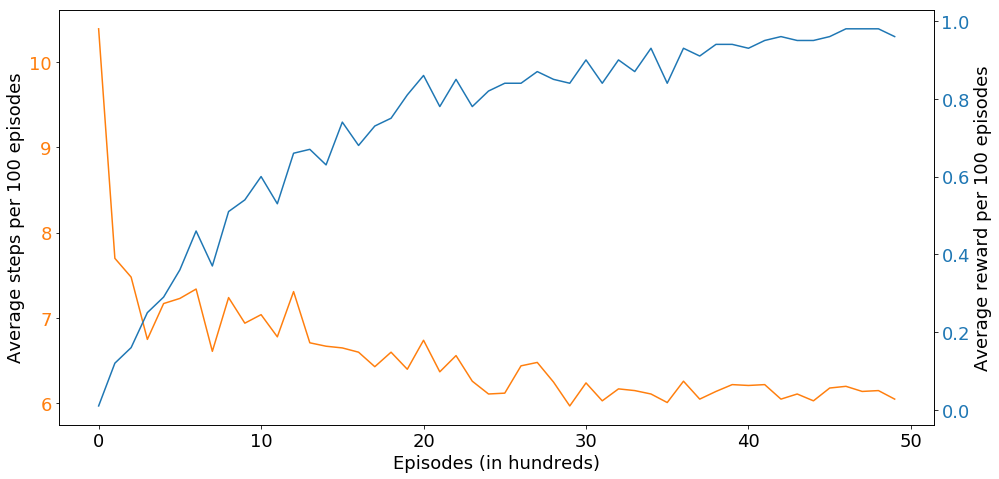

In [10]:
#plot average step vs reward for Q-learning agent

step_count = 0
step_graph = []
for s in steps_per_hundred_episodes:
    step_graph.append(sum(s/100))
    step_count +=100
    
reward_count = 0
reward_graph = []
for r in rewards_per_hundred_episodes:
    reward_graph.append(sum(r/100))
    reward_count +=100

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.plot(step_graph, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('Average steps per 100 episodes')
ax1.set_xlabel('Episodes (in hundreds)')
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.plot(reward_graph, color=color)
ax2.set_ylabel('Average reward per 100 episodes')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
plt.show()


In [11]:
#build model for our DQN agent

model = Sequential()
model.add(Embedding(16, 4, input_length=1))
model.add(Reshape((4,)))
print(model.summary())

#parameters for DQN agent
memory = SequentialMemory(limit=10000, window_length=1)
policy = EpsGreedyQPolicy()
actions = env.action_space.n

#create instance and compile DQN agent
DQN = DQNAgent(model=model, nb_actions=actions, memory=memory, nb_steps_warmup=500, target_model_update=0.01, 
               policy=policy, enable_double_dqn=False, batch_size=512)
DQN.compile(Adam())

#train DQN agent
metrics = DQN.fit(env, nb_steps=10000, visualize=False, verbose=2, nb_max_episode_steps=100)

#test agent on 3 episodes
DQN.test(env, nb_episodes=3, visualize=False)

#[5] - reference list in report

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 4)              64        
_________________________________________________________________
reshape_1 (Reshape)          (None, 4)                 0         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
None
Training for 10000 steps ...
  100/10000: episode: 1, duration: 0.116s, episode steps: 100, steps per second: 862, episode reward: 0.000, mean reward: 0.000 [0.000, 0.000], mean action: 0.290 [0.000, 3.000], mean observation: 0.210 [0.000, 4.000], loss: --, mean_q: --
  200/10000: episode: 2, duration: 0.031s, episode steps: 100, steps per second: 3251, episode reward: 0.000, mean reward: 0.000 [0.000, 0.000], mean action: 0.150 [0.000, 3.000], mean observation: 0.050 [0.000, 4.000], loss: --, mean_q: --
  300/10000: episode: 3, du

/Users/eijaz/anaconda3/lib/python3.6/site-packages/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


  548/10000: episode: 6, duration: 0.926s, episode steps: 48, steps per second: 52, episode reward: 0.000, mean reward: 0.000 [0.000, 0.000], mean action: 0.854 [0.000, 3.000], mean observation: 0.854 [0.000, 5.000], loss: 0.000053, mean_q: 0.020249
  582/10000: episode: 7, duration: 0.268s, episode steps: 34, steps per second: 127, episode reward: 0.000, mean reward: 0.000 [0.000, 0.000], mean action: 2.382 [0.000, 3.000], mean observation: 2.206 [0.000, 7.000], loss: 0.000004, mean_q: 0.034039
  617/10000: episode: 8, duration: 0.280s, episode steps: 35, steps per second: 125, episode reward: 0.000, mean reward: 0.000 [0.000, 0.000], mean action: 1.914 [0.000, 3.000], mean observation: 2.200 [0.000, 5.000], loss: 0.000002, mean_q: 0.031798
  676/10000: episode: 9, duration: 0.459s, episode steps: 59, steps per second: 129, episode reward: 0.000, mean reward: 0.000 [0.000, 0.000], mean action: 0.458 [0.000, 2.000], mean observation: 6.847 [4.000, 12.000], loss: 0.000002, mean_q: 0.027

In [12]:
#uncomment below to see steps and reward for each episode

# metrics.history

In [23]:
#SARSA

rewards_all_episodes = []
steps_all_episodes = []

#set SARSA parameters
exploration_rate = 0.9
exploration_decay_rate = 0.9999
num_episodes = 5000
max_steps_per_episode = 100
learning_rate = 0.01
discount_rate = 0.8

#initialize q table with zeros
q_table = np.zeros((env.observation_space.n, env.action_space.n))

#explore vs exploit using epsilon greedy policy
def choose_action(state):
    if np.random.uniform(0, 1) < exploration_rate:
        action = env.action_space.sample()
    else:
        action = np.argmax(q_table[state,:])
    return action

#update q table using SARSA algorithm
def learn(state, state2, reward, action, action2):
    target = reward + discount_rate * q_table[state2, action2]
    q_table[state, action] = q_table[state, action] + learning_rate * (target - q_table[state, action])

#train agent for 5000 episodes
for episode in range(num_episodes):
    steps = 0
    rewards_current_episode = 0
    state = env.reset()
    action = choose_action(state)
    
    #end episode if not over after 100 steps
    while steps < max_steps_per_episode:
        
        state2, reward, done, info = env.step(action)

        action2 = choose_action(state2)

        learn(state, state2, reward, action, action2)

        state = state2
        action = action2

        rewards_current_episode += reward
        steps += 1
        exploration_rate = exploration_rate * exploration_decay_rate
        
        if done:
            break
            
    rewards_all_episodes.append(rewards_current_episode)
    steps_all_episodes.append(steps)

print(q_table)

#[4] - reference list in report

[[9.25e-02 1.89e-02 2.96e-01 9.55e-02]
 [8.59e-02 0.00e+00 3.69e-01 1.20e-01]
 [1.22e-01 4.80e-01 4.66e-02 1.88e-01]
 [1.74e-01 0.00e+00 3.22e-03 2.18e-03]
 [5.73e-04 6.92e-02 0.00e+00 2.34e-03]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 6.22e-01 0.00e+00 1.74e-01]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [2.87e-03 0.00e+00 2.13e-01 1.32e-03]
 [2.66e-03 3.85e-02 5.09e-01 0.00e+00]
 [2.16e-01 7.89e-01 0.00e+00 2.45e-01]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 8.08e-03 5.65e-01 1.14e-02]
 [2.11e-01 5.68e-01 1.00e+00 3.66e-01]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00]]


In [24]:
print(rewards_all_episodes[4900:4950])

[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [27]:
#uncomment print statements to see values

#Calculate average reward per hundred episodes
rewards_per_hundred_episodes = np.split(np.array(rewards_all_episodes), num_episodes/100)
count = 100
# print('avg reward per 100 episodes\n\n')
for r in rewards_per_hundred_episodes:
#     print(count, " : ", str(sum(r/100)))
    count +=100
    
#Calculate average steps per hundred episodes
steps_per_hundred_episodes = np.split(np.array(steps_all_episodes), num_episodes/100)
count = 100
# print('avg steps per 100 episodes\n\n')
for r in steps_per_hundred_episodes:
#     print(count, " : ", str(sum(r/100)))
    count +=100

step_count = 0
step_graph = []
for s in steps_per_hundred_episodes:
    step_graph.append(sum(s/100))
    step_count +=100
    
reward_count = 0
reward_graph = []
for r in rewards_per_hundred_episodes:
    reward_graph.append(sum(r/100))
    reward_count +=100

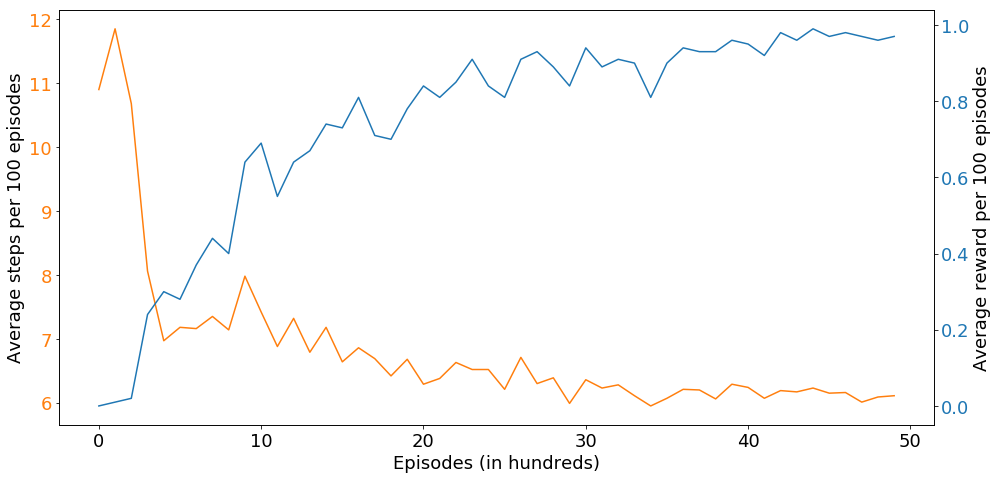

In [26]:
#plot average steps vs reward for SARSA agent

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.plot(step_graph, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('Average steps per 100 episodes')
ax1.set_xlabel('Episodes (in hundreds)')
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.plot(reward_graph, color=color)
ax2.set_ylabel('Average reward per 100 episodes')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
plt.show()